# BANK CUSTOMER CHURN PREDICTION

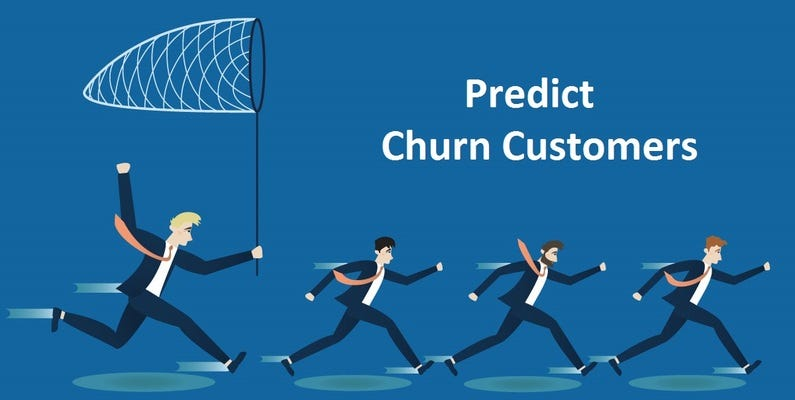

#### Dataset contains Bank's customer data .
#### Target variable is 'EXITED' which indicates whether customer closed his account (i.e Churned) which is 1 OR continues to be customer                         (i.e not churned) which is 0.

## Dataset contains following columns: 
###### 1) RowNumber: The order or sequence number of each entry in the dataset.
###### 2) CustomerId: A unique identifier assigned to each customer for tracking.
###### 3) Surname: The last name or family name of the customer.
###### 4) CreditScore: A numerical value representing the creditworthiness of the customer.
###### 5) Geography: The country or region where the customer is located.
###### 6) Gender: Whether the customer is male or female.
###### 7) Age: The age of the customer.
###### 8) Tenure: The duration for which the customer has been a client of the bank.
###### 9) Balance: The amount of money in the customer's bank account.
###### 10) NumOfProducts: The count of products (e.g., loans, credit cards, debit cards) the customer has with the bank.
###### 11) HasCrCard: Indicates whether the customer possesses a credit card (1 for yes, 0 for no).
###### 12) IsActiveMember: Specifies whether the customer is an active member of the bank.
###### 13) EstimatedSalary: The approximate salary of the customer.
###### 14) Exited: The target variable; 1 if the customer has left the bank, 0 if the customer has not left.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [37]:
df=pd.read_csv('C:/work/excel/Data Analysis with Excel/Bank Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Exploratary Data Analysis

In [38]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [40]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [41]:
df.shape

(10000, 14)

## Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

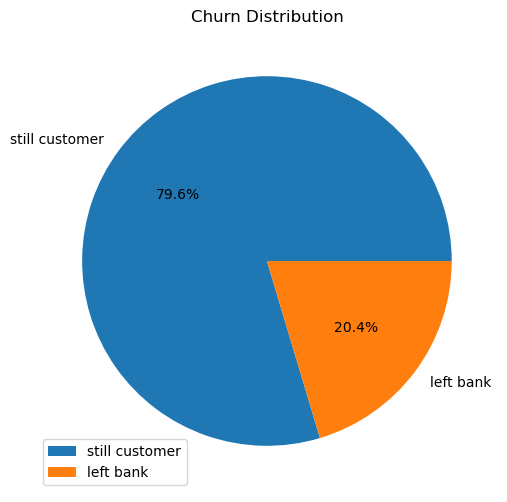

In [42]:
plt.figure(figsize=(8,6))
x=df['Exited'].value_counts()
xlabel=['still customer','left bank']
plt.pie(x,labels=xlabel,autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.legend(loc='lower left')
plt.show

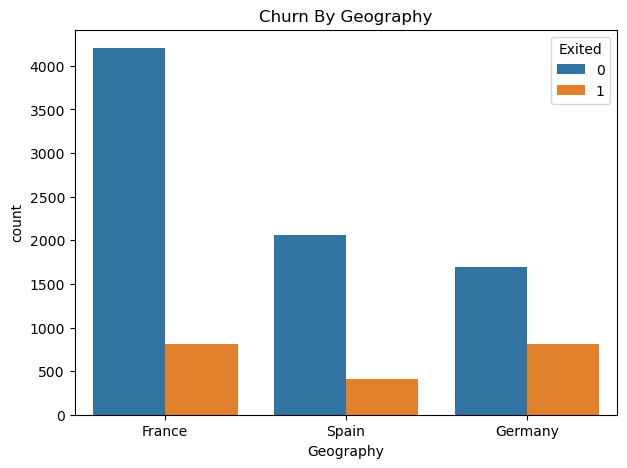

In [43]:
plt.figure(figsize=(7,5))
sns.countplot(x='Geography',hue='Exited', data=df)
plt.title('Churn By Geography')
plt.show()

## Interpretation: Geographic location significantly influences customer churn, with Germany and France exhibiting the highest rates followed by Spain.

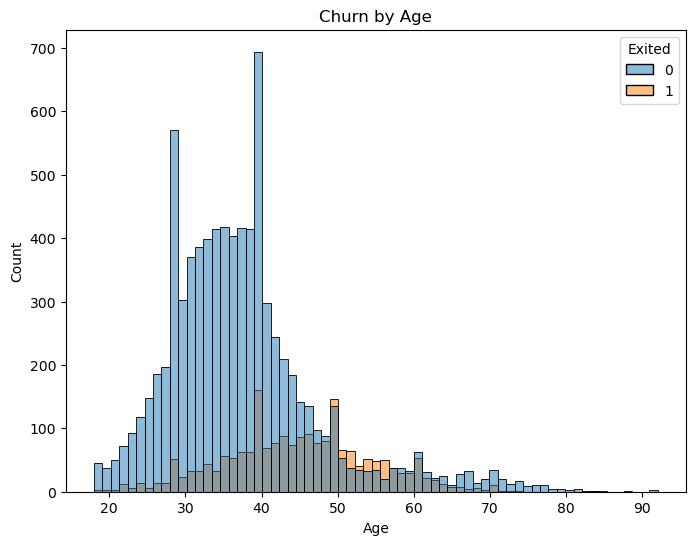

In [44]:
# churn by age
plt.figure(figsize=(8, 6))
sns.histplot(x='Age', hue='Exited', data=df)
plt.title('Churn by Age')
plt.show()

### Interpretations: It is observed that customer aged between 50-60 are most likely to churn , while other age groups tend to be customer

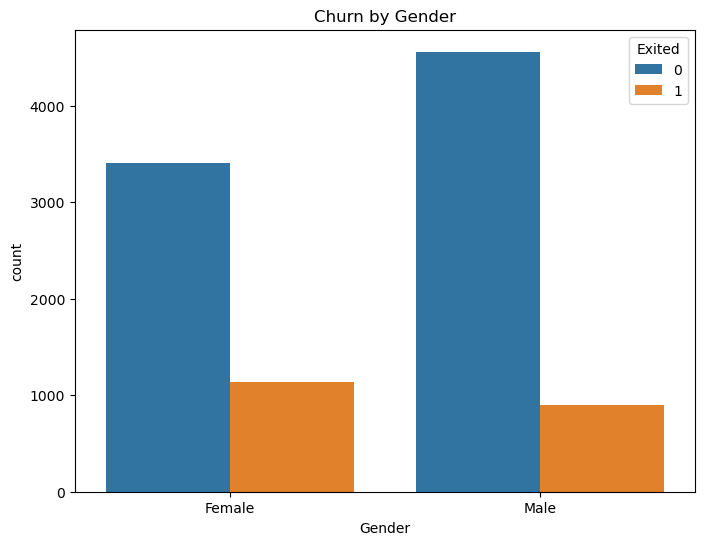

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',hue='Exited',data=df)
plt.title('Churn by Gender')
plt.legend
plt.show()

### Interpretation: Female customer have high churn rate than Male customer. Therefore, it shows that gender may play role in churn .

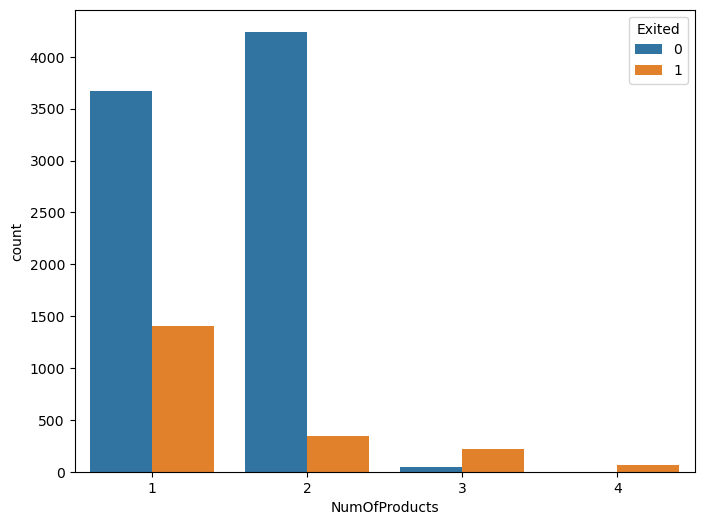

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x='NumOfProducts',hue='Exited',data=df)
plt.legend
plt.show()

### Interpretation : Customer having products are still customer with low churn rate and customer with low or no product have high churn rate.


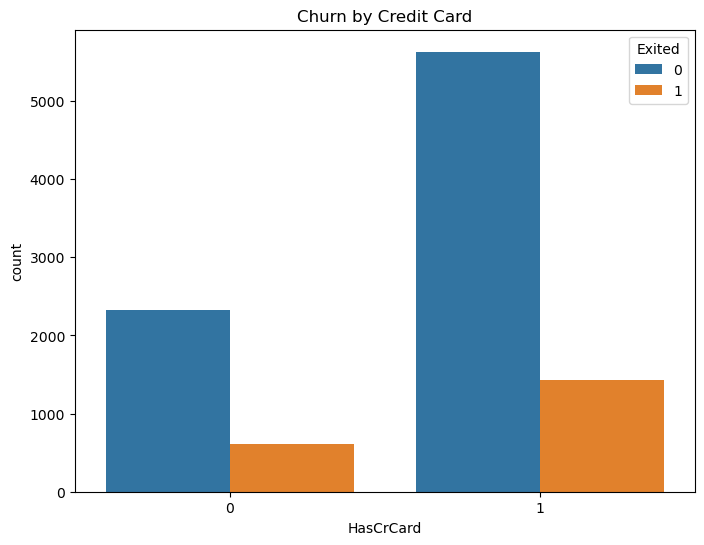

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Churn by Credit Card')
plt.legend
plt.show()

### Interpretation: The churn rate percentage for with No credit card is higher.

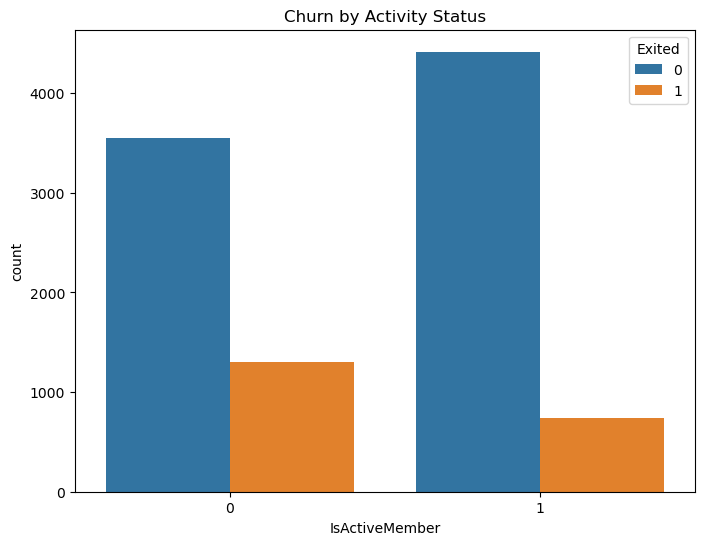

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Churn by Activity Status')
plt.show()

### Interpretation: Active members appear to have a lower churn rate compared to inactive members.

In [49]:
# correlation
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

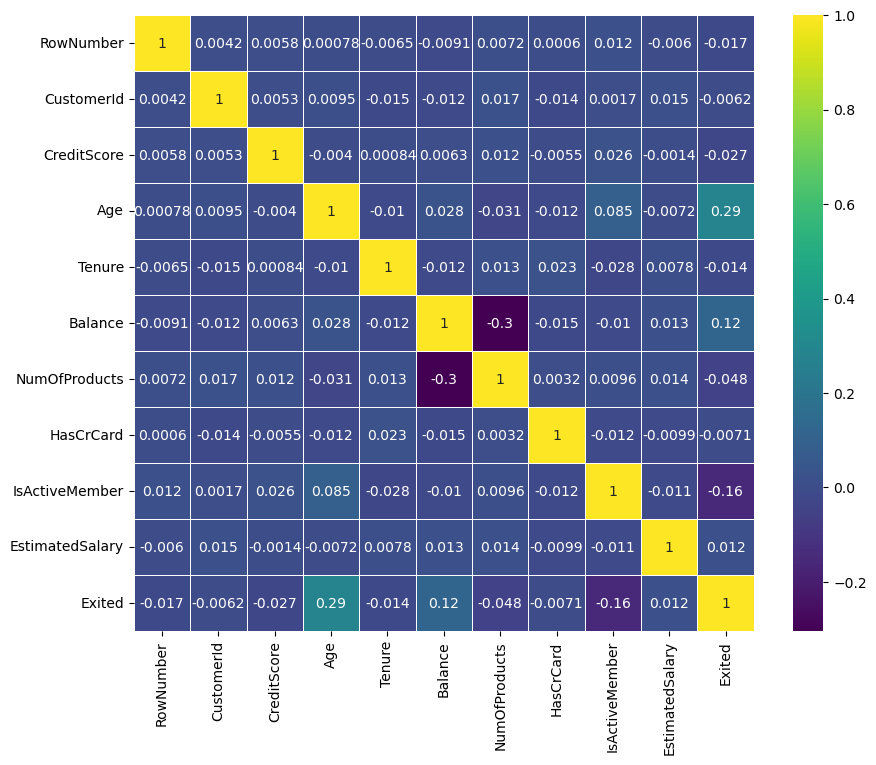

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,cmap='viridis')

# LABEL ENCODING

In [74]:
label=LabelEncoder()
df['Geography']=label.fit_transform(df['Geography'])
df['Gender']=label.fit_transform(df['Gender'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# Splitting

In [76]:
x=df.iloc[:,:-1];x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [78]:
y=df.iloc[:,-1];y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Normalization

In [79]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.538     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.718     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.21039009],
       [0.844     , 0.5       , 1.        , ..., 1.        , 0.        ,
        0.46442905],
       [0.884     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.19091423]])

# Splitting data to train data and test data

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3)
x_train

array([[0.568     , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.48968587],
       [0.356     , 0.        , 1.        , ..., 1.        , 0.        ,
        0.02704123],
       [0.53      , 0.5       , 1.        , ..., 1.        , 1.        ,
        0.7502556 ],
       ...,
       [0.546     , 0.        , 1.        , ..., 1.        , 0.        ,
        0.9643712 ],
       [0.882     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.11087339],
       [0.884     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23576467]])

# Model Building

In [81]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2372
           1       0.59      0.32      0.41       628

    accuracy                           0.81      3000
   macro avg       0.71      0.63      0.65      3000
weighted avg       0.79      0.81      0.79      3000



In [82]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2372
           1       0.78      0.47      0.59       628

    accuracy                           0.86      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [83]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2372
           1       0.70      0.25      0.37       628

    accuracy                           0.82      3000
   macro avg       0.76      0.61      0.63      3000
weighted avg       0.80      0.82      0.78      3000



In [84]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2372
           1       0.88      0.33      0.48       628

    accuracy                           0.85      3000
   macro avg       0.87      0.66      0.70      3000
weighted avg       0.86      0.85      0.82      3000



In [85]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2372
           1       0.53      0.51      0.52       628

    accuracy                           0.80      3000
   macro avg       0.70      0.69      0.70      3000
weighted avg       0.80      0.80      0.80      3000



In [86]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2372
           1       0.75      0.48      0.59       628

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [87]:
acc=pd.DataFrame({
    "Model":['KNN','NAIVE BAYES','SVC','DECISION TREE','RANDOM FORREST','ADABOOST'],
    "Accuracy":[0.82,0.84,0.85,0.79,0.87,0.85]
      })
acc

,Model,Accuracy
0,KNN,0.82
1,NAIVE BAYES,0.84
2,SVC,0.85
3,DECISION TREE,0.79
4,RANDOM FORREST,0.87
5,ADABOOST,0.85


<function matplotlib.pyplot.show(close=None, block=None)>

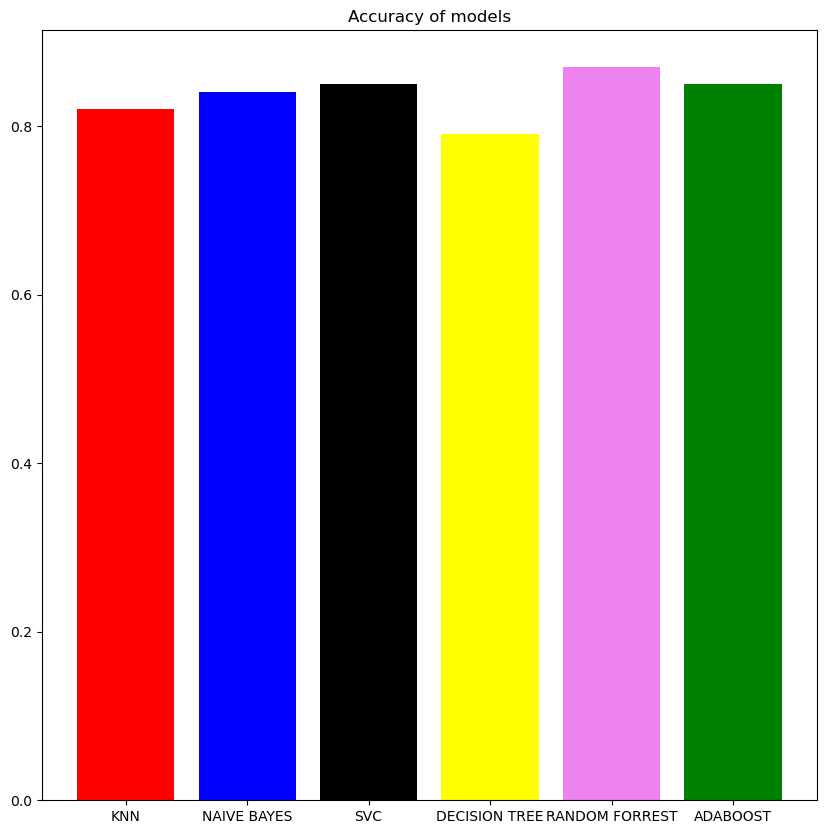

In [88]:
models=['KNN','NAIVE BAYES','SVC','DECISION TREE','RANDOM FORREST','ADABOOST']
Accuracy=[0.82,0.84,0.85,0.79,0.87,0.85]
plt.figure(figsize=(10,10))
plt.title('Accuracy of models')
plt.bar(models,Accuracy,color=['red','blue','black','yellow','violet','green'])
plt.show

## Interpretation : By comparing the performance measures of different algorithms the most accurate model is using Random Forest Classifier.

# Model testing

In [90]:
y_new=rf.predict(scaler.transform([[608,2,0,41,1,83807.86,1,0,1,112542.58]]))
if y_new==0:
    print("Continues to be customer")
else:
    print("Will Not continue to be customer")

Continues to be customer
